In [61]:
import pandas as pd

# Read in the csv file
df = pd.read_csv('/Users/celsogonzalezlopez/Desktop/healthcare_admissions - data.csv')
df

,DATE,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,DURATION,OUTCOME,SMOKING,ALCOHOL
0,4/1/2017,81,M,R,E,3,DISCHARGE,0,0
1,4/1/2017,65,M,R,E,5,DISCHARGE,0,1
2,4/1/2017,53,M,U,E,3,DISCHARGE,0,0
3,4/1/2017,67,F,U,E,8,DISCHARGE,0,0
4,4/1/2017,60,F,U,E,23,DISCHARGE,0,0
...,...,...,...,...,...,...,...,...,...
15752,31/03/2019,86,F,U,O,5,DISCHARGE,0,0
15753,3/31/2019,50,M,R,E,2,EXPIRY,0,0
15754,31/03/2019,82,M,U,E,10,DISCHARGE,0,0
15755,31/03/2019,59,F,U,O,4,DISCHARGE,0,0


In [23]:
from dateutil import parser

# Function to the dates
def parse_date(date_str):
    for fmt in (False, True):
        try:
            return parser.parse(date_str, dayfirst=fmt)
        except ValueError:
            continue
    return None  # Return None if the date cannot be parsed

# Apply the function to the 'DATE' column
df['date'] = df['DATE'].apply(parse_date)

df

,DATE,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,DURATION,OUTCOME,SMOKING,ALCOHOL,date
0,4/1/2017,81,M,R,E,3,DISCHARGE,0,0,2017-04-01
1,4/1/2017,65,M,R,E,5,DISCHARGE,0,1,2017-04-01
2,4/1/2017,53,M,U,E,3,DISCHARGE,0,0,2017-04-01
3,4/1/2017,67,F,U,E,8,DISCHARGE,0,0,2017-04-01
4,4/1/2017,60,F,U,E,23,DISCHARGE,0,0,2017-04-01
...,...,...,...,...,...,...,...,...,...,...
15752,31/03/2019,86,F,U,O,5,DISCHARGE,0,0,2019-03-31
15753,3/31/2019,50,M,R,E,2,EXPIRY,0,0,2019-03-31
15754,31/03/2019,82,M,U,E,10,DISCHARGE,0,0,2019-03-31
15755,31/03/2019,59,F,U,O,4,DISCHARGE,0,0,2019-03-31


In [25]:
# Cleaning up the data
df.drop(columns=['DATE'], inplace=True)
df.rename(columns={'TYPE OF ADMISSION-EMERGENCY/OPD': 'admission_type'}, inplace=True)
df = df.rename(columns=str.lower)

df

,age,gender,rural,admission_type,duration,outcome,smoking,alcohol,date
0,81,M,R,E,3,DISCHARGE,0,0,2017-04-01
1,65,M,R,E,5,DISCHARGE,0,1,2017-04-01
2,53,M,U,E,3,DISCHARGE,0,0,2017-04-01
3,67,F,U,E,8,DISCHARGE,0,0,2017-04-01
4,60,F,U,E,23,DISCHARGE,0,0,2017-04-01
...,...,...,...,...,...,...,...,...,...
15752,86,F,U,O,5,DISCHARGE,0,0,2019-03-31
15753,50,M,R,E,2,EXPIRY,0,0,2019-03-31
15754,82,M,U,E,10,DISCHARGE,0,0,2019-03-31
15755,59,F,U,O,4,DISCHARGE,0,0,2019-03-31


In [27]:
# Average age overall
avg_age_all = df['age'].mean().round(2)
print(f"Overall Average Age: {avg_age_all}\n")

# Average age by gender
avg_age_gender = df.groupby('gender')['age'].mean().round(2)
print(avg_age_gender)

Overall Average Age: 61.43

gender
F    61.72
M    61.25
Name: age, dtype: float64


In [29]:
# Oldest and youngest patients
oldest = df['age'].max()
youngest = df['age'].min() 

print(f"Oldest: {oldest} years old\nYoungest: {youngest} years old")

Oldest: 110 years old
Youngest: 4 years old


In [31]:
# Total count of patients by location and admission type
total_count = df.groupby(['rural', 'admission_type']).size().reset_index(name='count')

# Separate count by the location
countby_location = total_count.pivot(index='rural', columns='admission_type', values='count')

# Calculate proportion of patients with emergency admission by location
proportion_emergency = round((countby_location['E'] / countby_location.sum(axis=1)) * 100,2)


# Combine (admission type and proportion of emergency admissions by location) 
table1 = pd.concat([countby_location, proportion_emergency.rename('E%')], axis=1)
print(table1)

          E     O     E%
rural                   
R      2491  1189  67.69
U      8433  3644  69.83


In [33]:
# Calculate smoking and alcohol use by gender
smoking_alcohol_by_gender = df.groupby('gender')[['smoking', 'alcohol']].mean()

# Get percentages
smoking_alcohol_by_gender = (smoking_alcohol_by_gender * 100).round(2)

print(f"Smoking and alcohol use by gender (percentage)\n{smoking_alcohol_by_gender}")

Smoking and alcohol use by gender (percentage)
        smoking  alcohol
gender                  
F          0.29     0.31
M          7.77    10.04


In [35]:
# Average duration of stay (in days) by admission type
avg_duration = df.groupby('admission_type')['duration'].mean()

print(f"Average Duration of Stay in Days\nEmergency: {avg_duration.iloc[0]:.2f}\nOutpatient: {avg_duration.iloc[1]:.2f}")

Average Duration of Stay in Days
Emergency: 7.00
Outpatient: 5.09


In [37]:
# Deaths by year
year1 = df[df['date'].between('2017-04-01', '2018-03-31')]
year2 = df[df['date'].between('2018-04-01', '2019-03-31')]

year1_deaths = year1[year1['outcome'] == 'EXPIRY'].shape[0]
year2_deaths = year2[year2['outcome'] == 'EXPIRY'].shape[0]

print(f"Year 1 Deaths: {year1_deaths}\nYear 2 Deaths: {year2_deaths}")

Year 1 Deaths: 578
Year 2 Deaths: 527


In [39]:
# Overall deaths by location and by gender
overall_deaths = df[df['outcome'] == 'EXPIRY']

deaths_by_location = overall_deaths.groupby('rural').size()
deaths_by_gender = overall_deaths.groupby('gender').size()

print(f"Deaths by Location\n{deaths_by_location}\n\nDeaths by Gender\n{deaths_by_gender}")

Deaths by Location
rural
R    278
U    827
dtype: int64

Deaths by Gender
gender
F    403
M    702
dtype: int64


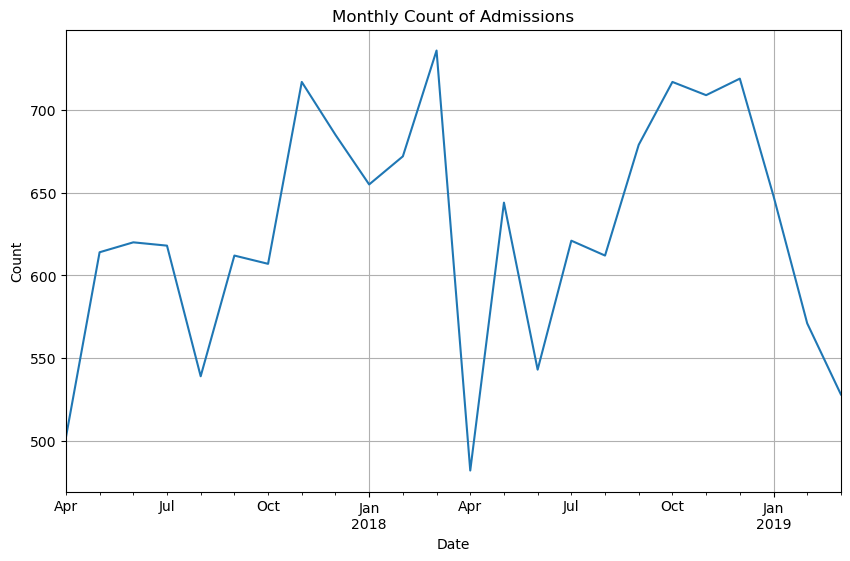

In [41]:
import matplotlib.pyplot as plt

df.set_index('date', inplace=True)

df.sort_index(inplace=True)

# Define the date range
start_date = '2017-04-01'
end_date = '2019-03-31'

df_slice = df.loc[start_date:end_date]

# Resample to monthly and count it
monthly_count = df_slice.resample('M').size()

plt.figure(figsize=(10, 6))
monthly_count.plot()
plt.title('Monthly Count of Admissions')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(True)
plt.show()

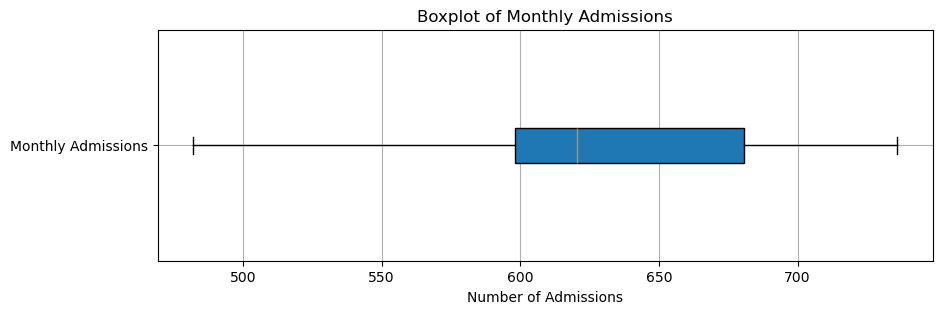

In [43]:
# Boxplot
plt.figure(figsize=(10, 3))
plt.boxplot(monthly_count.values, vert=False, patch_artist=True)
plt.title('Boxplot of Monthly Admissions')
plt.xlabel('Number of Admissions')
plt.yticks([1], ['Monthly Admissions']) 
plt.grid(True)
plt.show()

In [45]:
monthly_count.describe()

count     24.000000
mean     627.083333
std       71.762844
min      482.000000
25%      598.000000
50%      620.500000
75%      680.500000
max      736.000000
dtype: float64

In [51]:
# Hypothesis Testing... whether there is significant difference between length of stay among genders
# Null Hypothesis: There is no difference in the average duration of stay between male and female patients.
# Alt Hypothesis: There is a difference in the average duration of stay between male and female patients.

# First check assumptions for t-test, normality and homogeneity of variances

from scipy.stats import ttest_ind, shapiro, levene

# Separate data by gender
male_duration = df[df['gender'] == 'M']['duration']
female_duration = df[df['gender'] == 'F']['duration']

# Calculate the means
mean_male_duration = male_duration.mean()
mean_female_duration = female_duration.mean()

# Test for normality
shapiro_male = shapiro(male_duration)
shapiro_female = shapiro(female_duration)

print(f'Male: {shapiro_male}')
print(f'Female: {shapiro_female}')

# Test for homogeneity of variances
levene_test = levene(male_duration, female_duration)

print(levene_test)

Male: ShapiroResult(statistic=0.7540090084075928, pvalue=0.0)
Female: ShapiroResult(statistic=0.7830672860145569, pvalue=0.0)
LeveneResult(statistic=6.100362376240966, pvalue=0.013525931302938396)


/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [63]:
# T-test
t_stat, p_value = ttest_ind(male_duration, female_duration)

print(f'T-stat: {t_stat}, P-value: {p_value}')
print(f'Avg Stay for Males: {mean_male_duration:.2f} days\nAvg Stay for Females: {mean_female_duration:.2f} days')

T-stat: -2.387552161410386, P-value: 0.01697271060060154
Avg Stay for Males: 6.34 days
Avg Stay for Females: 6.54 days


In [28]:
# P-value is < .05 so reject the null
# Conclude that there is a statistically significant difference in the average duration of stay between genders
# (Females stay at the hospital .2 days or 4.8 hours longer on average)